In [1]:
import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "./config/rf_2_augment_3.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

2it [00:00, 19.50it/s]

centering images


15429it [05:39, 45.40it/s]
 27%|██▋       | 16188/60000 [03:16<08:50, 82.55it/s]

failed


 41%|████▏     | 24767/60000 [04:53<06:57, 84.44it/s]

failed


 68%|██████▊   | 40847/60000 [08:00<03:45, 84.98it/s]

failed


 76%|███████▌  | 45733/60000 [08:55<02:47, 85.39it/s]

failed


 78%|███████▊  | 46898/60000 [09:08<02:33, 85.44it/s]

failed


 83%|████████▎ | 49580/60000 [09:39<02:01, 85.50it/s]

failed


 92%|█████████▏| 55319/60000 [10:43<00:54, 85.92it/s]

failed


100%|██████████| 60000/60000 [11:39<00:00, 85.76it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C.shape)

(59993, 160, 160)
(59993, 15)


54174


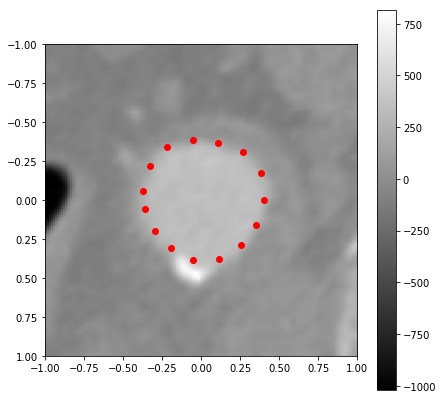

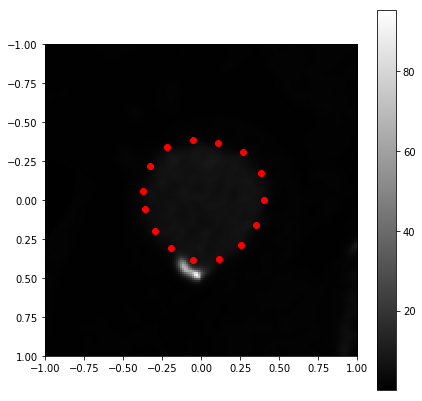

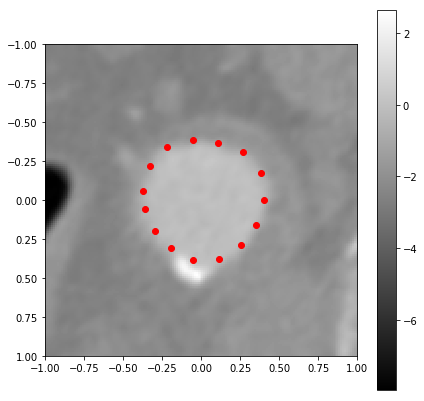

In [81]:
mid = int(X.shape[1]/2)
i = np.random.randint(N)
print(i)
x = X[i]

xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)
# xnorm_ = np.exp(xnorm)
# xnorm_[xnorm_>10] = 10

xnorm_ = (1.0*x-x[mid,mid])/(np.std(x)+1e-5)
c = C[i]

c = vessel_regression.pred_to_contour(c)

plt.figure(figsize=(7,7))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(np.exp(xnorm),cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(xnorm_,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()
# plt.figure()
# plt.imshow(X[i+int(N/3)],cmap='gray', extent=[-1, 1, 1, -1])
# plt.colorbar()
# plt.scatter(c_[:,0],c_[:,1],color='r')
# plt.show()

# plt.figure()
# plt.imshow(X[i+int(2*N/3)],cmap='gray', extent=[-1, 1, 1, -1])
# plt.colorbar()
# plt.scatter(c__[:,0],c__[:,1],color='r')
# plt.show()